In [2]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv("C:\\Users\\hp\\A4_test.csv")

In [4]:
df.head()

,Feature1,Feature2,Label
0,0.911100,-0.499137,0.0
1,-1.460326,-0.681642,0.0
2,-1.063950,-1.106004,0.0
3,1.723053,1.159836,1.0
4,-1.078729,1.067450,0.0


In [15]:
#independent feature
x = df.drop(columns=['Label'])


In [16]:
#Dependent feature
y=df['Label']

In [17]:
y

0     0.0
1     0.0
2     0.0
3     1.0
4     0.0
     ... 
85    0.0
86    0.0
87    1.0
88    1.0
89    0.0
Name: Label, Length: 90, dtype: float64

In [18]:
x

,Feature1,Feature2
0,0.911100,-0.499137
1,-1.460326,-0.681642
2,-1.063950,-1.106004
3,1.723053,1.159836
4,-1.078729,1.067450
...,...,...
85,-1.362365,1.291234
86,-0.623371,-1.324463
87,-0.997093,1.853777
88,1.050612,1.101351


In [19]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
##apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(criterion='gini')

In [24]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

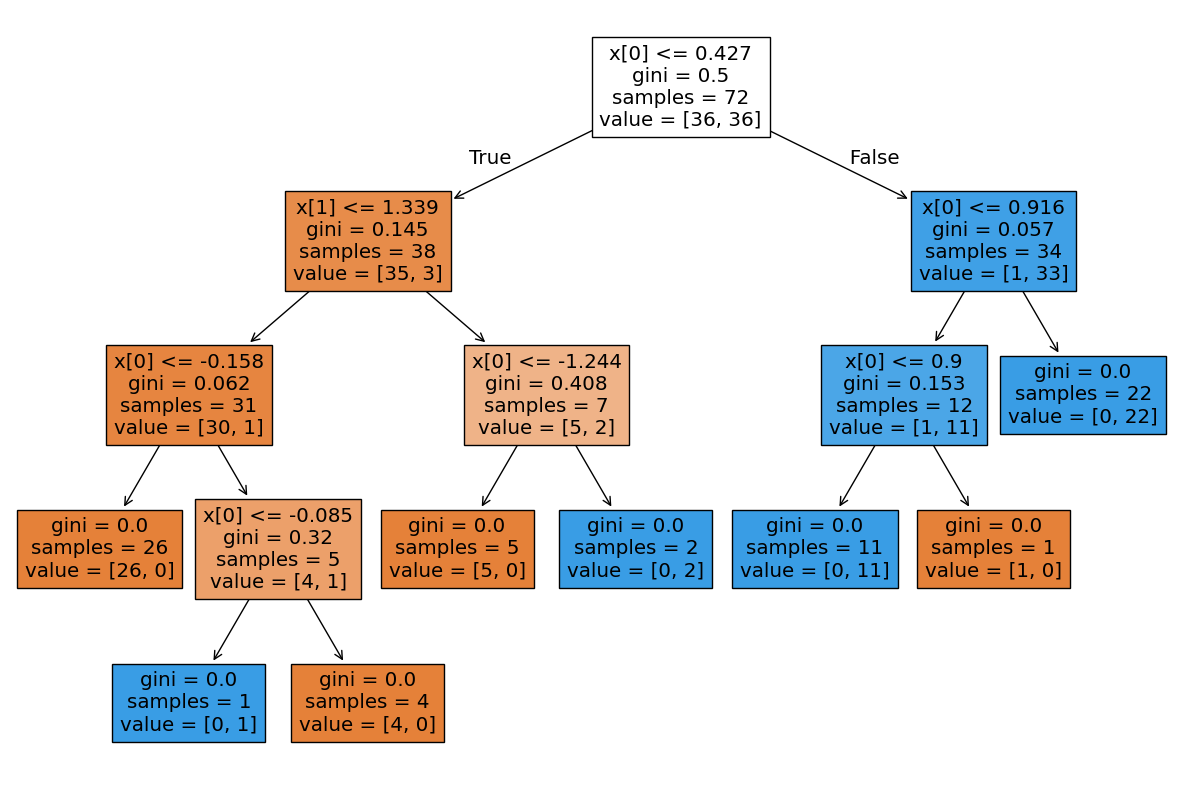

In [25]:
##Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

In [26]:
depths = range(1, 11)
sse_list = []

In [27]:

for d in depths:
    model = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=0)
    model.fit(X, y)
    y_prob = model.predict_proba(X)[:, 1]
    sse = np.sum((y - y_prob)**2)
    sse_list.append(sse)



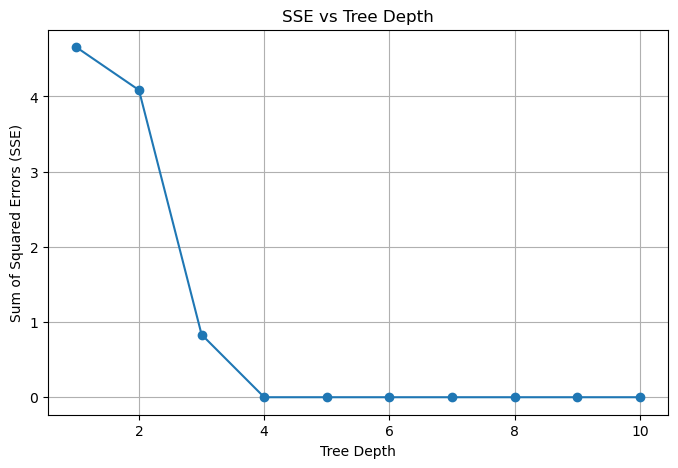

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(depths, sse_list, marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs Tree Depth")
plt.grid(True)
plt.show()

In [31]:
delta_sse = np.diff(sse_list)
threshold = 0.01  # Minimal change threshold
optimal_depth = None




In [32]:
for i, delta in enumerate(delta_sse):
    if abs(delta) < threshold:
        optimal_depth = depths[i + 1]
        break
        
if optimal_depth is None:
    optimal_depth = depths[np.argmin(sse_list)]

print(f"Optimal Pruning Depth: {optimal_depth}")

Optimal Pruning Depth: 5


In [34]:
#post prunning
treeclassifiermod=DecisionTreeClassifier(max_depth=optimal_depth)

In [35]:
treeclassifiermod.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

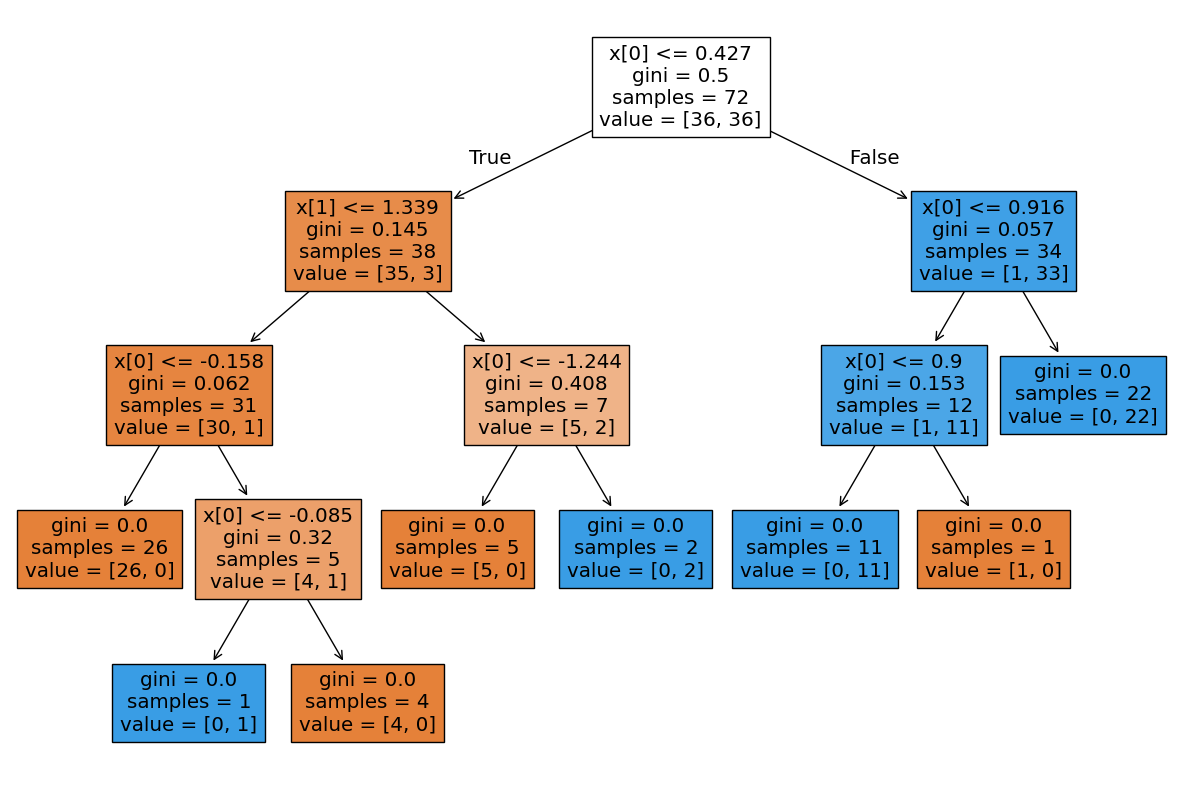

In [36]:
##Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifiermod,filled=True)
plt.show()

**Q2**

In [37]:
df2= pd.read_csv("C:\\Users\\hp\\A2_test.csv", drop=inde)

In [39]:
df2 = df2.drop(columns=['Samples'])

In [41]:
df2.head()

,Feature 1,Feature 2,Output
0,0.7,48000,1
1,1.9,48000,0
2,2.5,60000,1
3,4.2,63000,0
4,6.0,76000,0


In [46]:
X= df2.drop(columns=['Output'])

In [47]:
X

,Feature 1,Feature 2
0,0.7,48000
1,1.9,48000
2,2.5,60000
3,4.2,63000
4,6.0,76000
...,...,...
195,6.5,84000
196,6.9,73000
197,5.1,72000
198,9.1,69000


In [48]:
Y=df2['Output']

In [49]:
Y

0      1
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Output, Length: 200, dtype: int64

In [50]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [66]:
#modelfitting
from sklearn.linear_model import LinearRegression, Ridge, Lasso
 #Initialize models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

In [67]:
from sklearn.metrics import mean_squared_error
mse_scores = []
coefficients = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mse_scores.append(mse)
    coefficients.append(model.coef_)


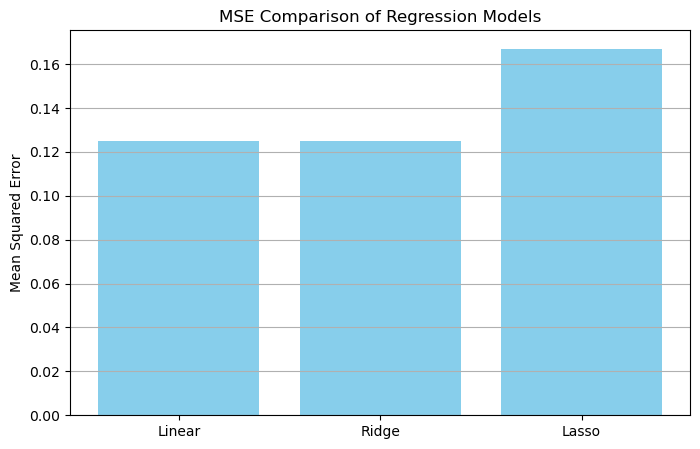

In [68]:
# Plotting feature coefficients
plt.figure(figsize=(8, 5))
plt.bar(models.keys(), mse_scores, color='skyblue')
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison of Regression Models")
plt.grid(axis='y')
plt.show()